# Titanic Data Analysis

# Step 1: Import required libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Step 2: Loading the dataset

In [3]:
titanic_ds = pd.read_csv('Train_Titanic.csv')

In [4]:
titanic_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_ds.shape

(891, 12)

In [6]:
titanic_ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Step 3: Exploratory Data Analysis 

In [7]:
titanic_ds.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

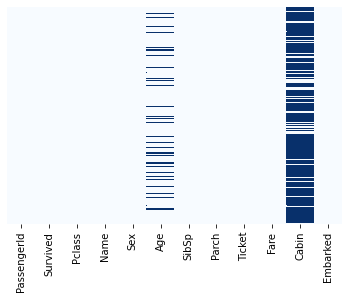

In [9]:
sns.heatmap(titanic_ds.isnull() , yticklabels = False , cbar = False , cmap = 'Blues')

In [10]:
titanic_ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Survived vs Dead')

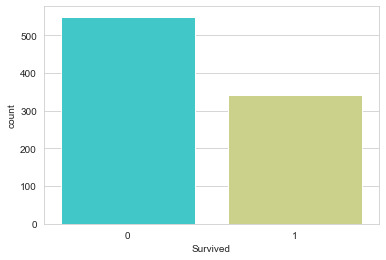

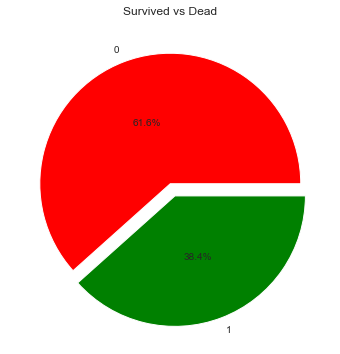

In [60]:
# how many people are survived & not survived
sns.countplot(x ='Survived' , data = titanic_ds , palette = 'rainbow') # creates bar chart

f,ax = plt.subplots(figsize=(10,6))
plt.pie(x = titanic_ds['Survived'].value_counts() , autopct='%1.1f%%' , explode=[0,0.1],labels = titanic_ds.Survived.unique(),pctdistance=0.5,colors=['red','green'])
plt.title('Survived vs Dead')

In [63]:
# Out of 891 passengers in training set, only 342 survived i.e Only 38.4% of the total training set,survived the crash.

print('No.of people survived = ',sum(titanic_ds['Survived']==1)) 

print('No.of people not survived = ',sum(titanic_ds['Survived']==0))

No.of people survived =  342
No.of people not survived =  549


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

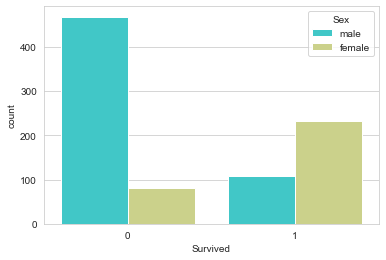

In [34]:
# how many women & men are there in survived and not survived

sns.set_style('whitegrid')

sns.countplot(x='Survived' , hue ='Sex' , data = titanic_ds ,  palette = 'rainbow')

titanic_ds.groupby(['Survived','Sex'])['Survived'].count() # Statistical analysis


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

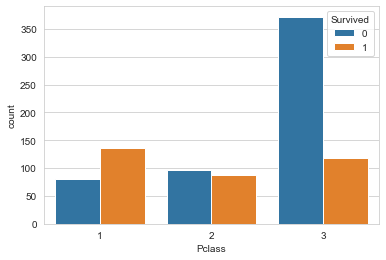

In [36]:
# how many people survived/not survived in each class
sns.set_style('whitegrid')
sns.countplot(x='Pclass' , hue = 'Survived' ,  data = titanic_ds)

titanic_ds.groupby(['Pclass' , 'Survived'])['Survived'].count()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Sex, dtype: int64

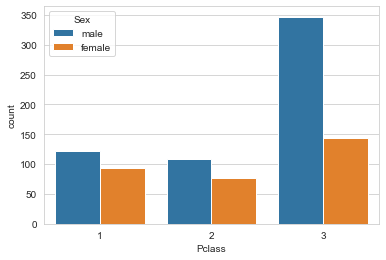

In [64]:
sns.countplot(x = 'Pclass' , hue = 'Sex' , data = titanic_ds)

titanic_ds.groupby(['Pclass','Sex'])['Sex'].count()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

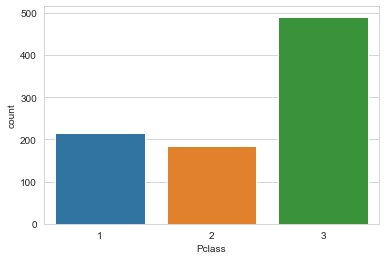

In [74]:
# No.of passengers in each class
sns.countplot(data = titanic_ds ,x = 'Pclass')

In [78]:
print('Oldest passenger age is = ',titanic_ds['Age'].max() , 'years')
print('youngest passenger age is = ',titanic_ds['Age'].min(), 'years')
print('Average age in the ship is = ',titanic_ds['Age'].mean(), 'years')

Oldest passenger age is =  80.0 years
youngest passenger age is =  0.42 years
Average age in the ship is =  29.69911764705882 years


<AxesSubplot:xlabel='Age'>

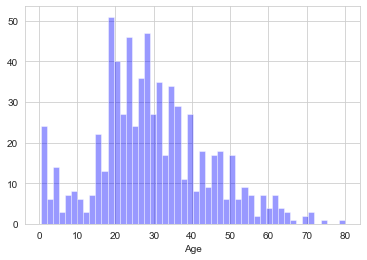

In [42]:
sns.distplot(titanic_ds['Age'].dropna() , kde = False , color = 'blue' , bins = 50)

<AxesSubplot:>

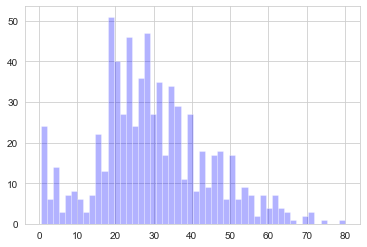

In [43]:
titanic_ds['Age'].hist(color = 'blue' , bins = 50 , alpha = 0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

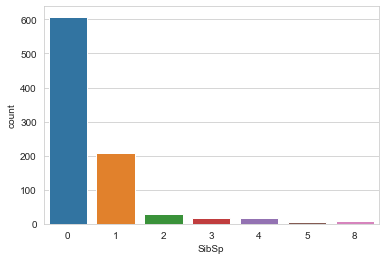

In [45]:
sns.countplot(x = 'SibSp' , data = titanic_ds)

<AxesSubplot:>

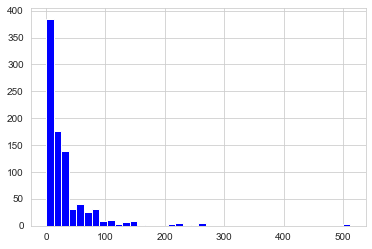

In [46]:
titanic_ds['Fare'].hist(color = 'blue' , bins = 40)